In [1]:
import pandas as pd
import numpy as np
from Utils import *

In [10]:
data_path = 'C:\\Users\\amoha\\Detect-Sleep-States-CMI-data\\'
series = "train_series.parquet"
events = "train_events.csv"


#train_series = pd.read_parquet(data_path+series)
train_events = pd.read_csv(data_path+events)


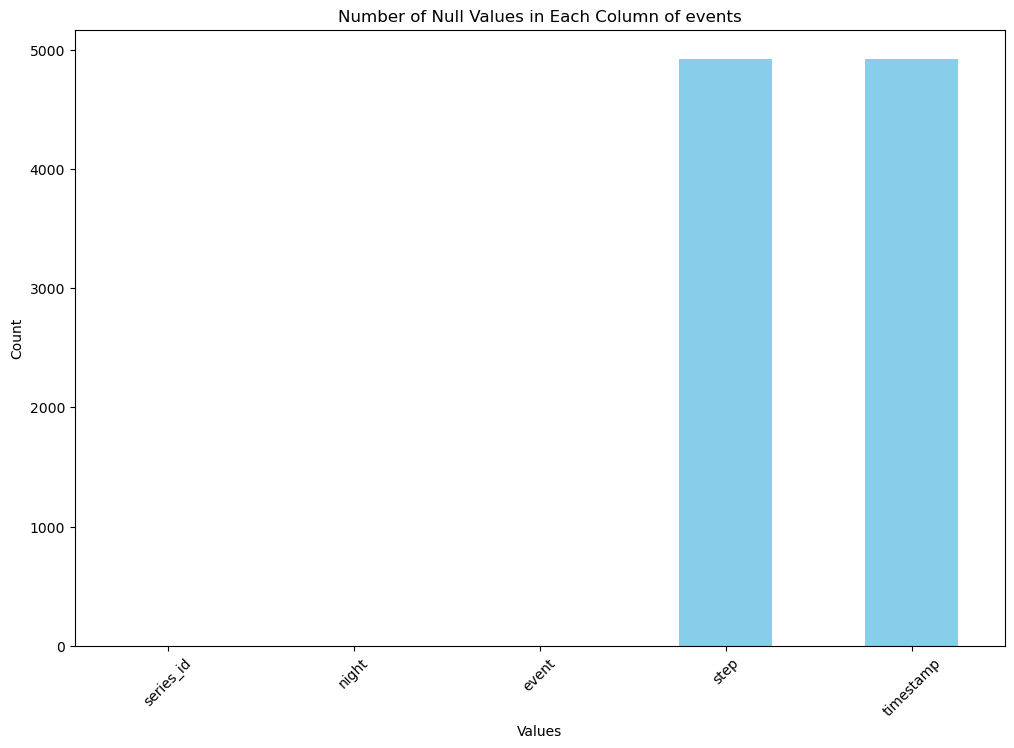

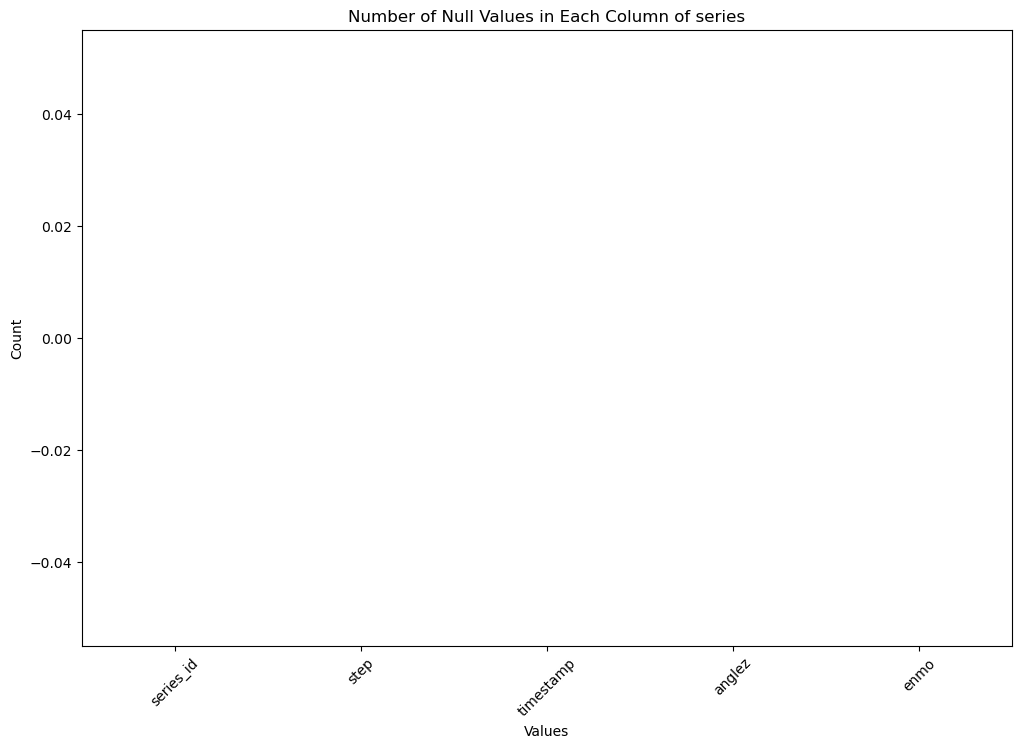

In [3]:
null_values = train_events.isnull()
null_counts = null_values.sum()
Title = "Number of Null Values in Each Column of events"
plot(null_counts,"bar",Title)

null_values = train_series.isnull()
null_counts = null_values.sum()
Title = "Number of Null Values in Each Column of series"
plot(null_counts,"bar",Title)

In [4]:
train_series["date"] = train_series["timestamp"].apply(lambda x: x[:10])
train_series["hour"] = train_series["timestamp"].apply(lambda x: x[11:13])


cleaned_train = train_events.dropna(subset=['timestamp']).copy()


cleaned_train["date"] = cleaned_train["timestamp"].apply(lambda x: x[:10])
cleaned_train["star_hr"] = cleaned_train["timestamp"].apply(lambda x: x[11:16])
cleaned_train["end_hr"] = cleaned_train["timestamp"].apply(lambda x: x[20:])


num_days = len(train_series.date.unique())
print(f"There are {num_days} days of data in the dataset")

cleaned_train


There are 705 days of data in the dataset


,series_id,night,event,step,timestamp,date,star_hr,end_hr
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,2018-08-14,22:26,0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,2018-08-15,06:41,0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400,2018-08-15,19:37,0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,2018-08-16,05:41,0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400,2018-08-16,23:03,0400
...,...,...,...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0,2017-09-05T09:26:00-0400,2017-09-05,09:26,0400
14502,fe90110788d2,33,onset,556560.0,2017-09-05T22:30:00-0400,2017-09-05,22:30,0400
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400,2017-09-06,04:07,0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400,2017-09-06,23:35,0400


In [5]:
cleaned_train = cleaned_train.sort_values(by='night')
cleaned_train = cleaned_train.reset_index(drop=True)

In [6]:
len(cleaned_train.date.unique())

700

In [7]:
onset_data = cleaned_train[cleaned_train.event == "onset"]
wakeup_data = cleaned_train[cleaned_train.event == "wakeup"]

In [8]:
onset_data

,series_id,night,event,step,timestamp,date,star_hr,end_hr
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,2018-08-14,22:26,0400
2,361366da569e,1,onset,4716.0,2019-01-10T22:33:00-0500,2019-01-10,22:33,0500
5,d8de352c2657,1,onset,7812.0,2018-06-11T23:06:00-0400,2018-06-11,23:06,0400
6,3664fe9233f9,1,onset,2556.0,2018-02-05T22:03:00-0500,2018-02-05,22:03,0500
8,3665c86afaf5,1,onset,6660.0,2017-08-22T02:15:00-0400,2017-08-22,02:15,0400
...,...,...,...,...,...,...,...,...
9575,d043c0ca71cd,40,onset,681096.0,2019-02-03T21:13:00-0500,2019-02-03,21:13,0500
9576,6ca4f4fca6a2,40,onset,680532.0,2018-12-30T21:56:00-0500,2018-12-30,21:56,0500
9579,d043c0ca71cd,41,onset,699204.0,2019-02-04T22:22:00-0500,2019-02-04,22:22,0500
9582,d043c0ca71cd,42,onset,716532.0,2019-02-05T22:26:00-0500,2019-02-05,22:26,0500


In [10]:
onset_data['date'] = pd.to_datetime(onset_data['date'])
train_series['timestamp'] = pd.to_datetime(train_series['timestamp'])

C:\Users\amoha\AppData\Local\Temp\ipykernel_18940\311614984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_data['date'] = pd.to_datetime(onset_data['date'])


KeyboardInterrupt: 

In [ ]:
onset = []
for idx,date in enumerate(onset_data.date):
    start = onset_data.star_hr[idx]
    end = onset_data.end_hr[idx]
    series_id = onset_data.series_id[idx]
    extracted_subset = train_series[
        (train_series['series_id'] == series_id) &
        (train_series['date'].dt.date == date.date()) &  # Match the date
        (train_series['hour'].dt.hour >= start) &    # Start hour condition
        (train_series['hour'].dt.hour <= end)       # End hour condition
    ]
    onset.append(extracted_subset)

In [9]:
train_series

,series_id,step,timestamp,anglez,enmo,date,hour
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,2018-08-14,15
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,2018-08-14,15
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,2018-08-14,15
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,2018-08-14,15
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,2018-08-14,15
...,...,...,...,...,...,...,...
127946335,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204,2017-09-08,00
127946336,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233,2017-09-08,00
127946337,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202,2017-09-08,00
127946338,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199,2017-09-08,00
